<a href="https://colab.research.google.com/github/FelipeOcampo03/binaryclasification/blob/main/clasificacionbinaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
    print(word_index.get(_ - 3))

def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorizar(train_data)
x_test = vectorizar(test_data)
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.3)


Epoch 1/20
35/35 [==============================] - 8s 56ms/step - loss: 0.5431 - accuracy: 0.7924 - val_loss: 0.4400 - val_accuracy: 0.8405
Epoch 2/20
35/35 [==============================] - 1s 26ms/step - loss: 0.3454 - accuracy: 0.8901 - val_loss: 0.3172 - val_accuracy: 0.8852
Epoch 3/20
35/35 [==============================] - 1s 30ms/step - loss: 0.2589 - accuracy: 0.9122 - val_loss: 0.2889 - val_accuracy: 0.8852
Epoch 4/20
35/35 [==============================] - 1s 29ms/step - loss: 0.2124 - accuracy: 0.9286 - val_loss: 0.2759 - val_accuracy: 0.8880
Epoch 5/20
35/35 [==============================] - 1s 24ms/step - loss: 0.1815 - accuracy: 0.9385 - val_loss: 0.3078 - val_accuracy: 0.8780
Epoch 6/20
35/35 [==============================] - 1s 21ms/step - loss: 0.1583 - accuracy: 0.9474 - val_loss: 0.3228 - val_accuracy: 0.8761
Epoch 7/20
35/35 [==============================] - 1s 25ms/step - loss: 0.1400 - accuracy: 0.9540 - val_loss: 0.3070 - val_accuracy: 0.8803
Epoch 8/20
35

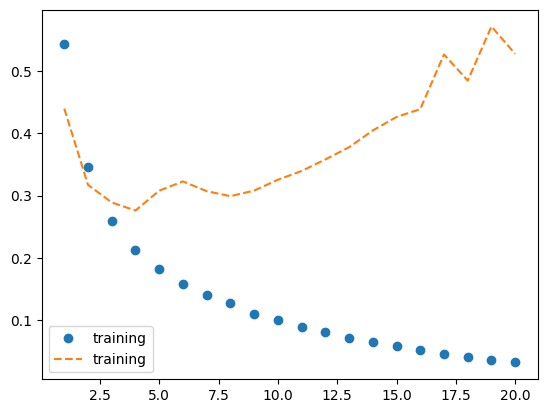

In [3]:
import matplotlib.pyplot as plt

history_dict= history.history
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
epoch= range(1,len(loss_values)+1)
plt.plot(epoch, loss_values,'o', label= 'training')
plt.plot(epoch, val_loss_values,'--', label= 'training')
plt.legend()
plt.show()

In [4]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.5728 - accuracy: 0.8570


[0.5728011131286621, 0.8570399880409241]

##Modelo menos complejo

In [5]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 3s 51ms/step - loss: 0.6061 - accuracy: 0.7349 - val_loss: 0.5224 - val_accuracy: 0.8609
Epoch 2/20
35/35 [==============================] - 1s 21ms/step - loss: 0.4604 - accuracy: 0.8752 - val_loss: 0.4261 - val_accuracy: 0.8824
Epoch 3/20
35/35 [==============================] - 1s 25ms/step - loss: 0.3638 - accuracy: 0.9065 - val_loss: 0.3591 - val_accuracy: 0.8811
Epoch 4/20
35/35 [==============================] - 1s 20ms/step - loss: 0.2934 - accuracy: 0.9227 - val_loss: 0.3137 - val_accuracy: 0.8887
Epoch 5/20
35/35 [==============================] - 1s 20ms/step - loss: 0.2438 - accuracy: 0.9320 - val_loss: 0.2902 - val_accuracy: 0.8924
Epoch 6/20
35/35 [==============================] - 1s 21ms/step - loss: 0.2092 - accuracy: 0.9383 - val_loss: 0.2788 - val_accuracy: 0.8920
Epoch 7/20
35/35 [==============================] - 1s 21ms/step - loss: 0.1820 - accuracy: 0.9479 - val_loss: 0.2799 - val_accuracy: 0.8913
Epoch 8/20
35

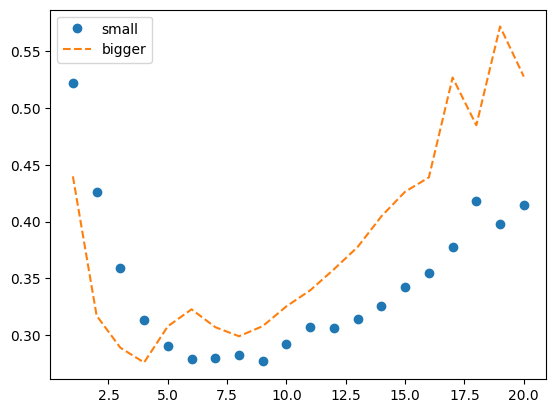

In [6]:
history_dict= history.history
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']

val_loss_values_2= history2.history['val_loss']
epoch= range(1,len(loss_values)+1)
plt.plot(epoch, val_loss_values_2,'o', label= 'small')
plt.plot(epoch, val_loss_values,'--', label= 'bigger')
plt.legend()
plt.show()

##Regularización

In [7]:
from keras import regularizers

In [8]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 4s 49ms/step - loss: 0.5642 - accuracy: 0.7846 - val_loss: 0.4341 - val_accuracy: 0.8663
Epoch 2/20
35/35 [==============================] - 1s 28ms/step - loss: 0.3687 - accuracy: 0.8921 - val_loss: 0.3657 - val_accuracy: 0.8788
Epoch 3/20
35/35 [==============================] - 1s 37ms/step - loss: 0.2998 - accuracy: 0.9119 - val_loss: 0.3310 - val_accuracy: 0.8884
Epoch 4/20
35/35 [==============================] - 1s 21ms/step - loss: 0.2618 - accuracy: 0.9262 - val_loss: 0.3207 - val_accuracy: 0.8923
Epoch 5/20
35/35 [==============================] - 1s 21ms/step - loss: 0.2385 - accuracy: 0.9346 - val_loss: 0.3381 - val_accuracy: 0.8845
Epoch 6/20
35/35 [==============================] - 1s 23ms/step - loss: 0.2222 - accuracy: 0.9423 - val_loss: 0.3294 - val_accuracy: 0.8908
Epoch 7/20
35/35 [==============================] - 1s 24ms/step - loss: 0.2158 - accuracy: 0.9446 - val_loss: 0.3356 - val_accuracy: 0.8880
Epoch 8/20
35

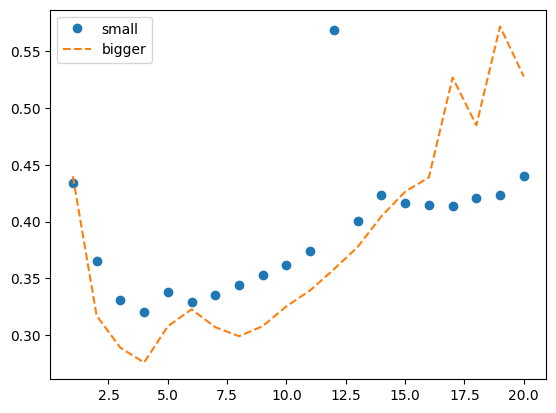

In [10]:
history_dict= history.history
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
val_loss_values_3= history3.history['val_loss']

epoch= range(1,len(loss_values)+1)
plt.plot(epoch, val_loss_values_3,'o', label= 'small')
plt.plot(epoch, val_loss_values,'--', label= 'bigger')
plt.legend()
plt.show()

##Dropout

In [11]:
model4 = models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.3)

Epoch 1/20
35/35 [==============================] - 3s 50ms/step - loss: 0.6702 - accuracy: 0.5789 - val_loss: 0.6292 - val_accuracy: 0.7555
Epoch 2/20
35/35 [==============================] - 1s 21ms/step - loss: 0.6298 - accuracy: 0.6566 - val_loss: 0.5825 - val_accuracy: 0.8205
Epoch 3/20
35/35 [==============================] - 1s 24ms/step - loss: 0.6059 - accuracy: 0.6831 - val_loss: 0.5583 - val_accuracy: 0.8784
Epoch 4/20
35/35 [==============================] - 1s 21ms/step - loss: 0.5795 - accuracy: 0.7110 - val_loss: 0.5213 - val_accuracy: 0.8836
Epoch 5/20
35/35 [==============================] - 1s 22ms/step - loss: 0.5634 - accuracy: 0.7194 - val_loss: 0.4916 - val_accuracy: 0.8857
Epoch 6/20
35/35 [==============================] - 1s 29ms/step - loss: 0.5408 - accuracy: 0.7355 - val_loss: 0.4612 - val_accuracy: 0.8872
Epoch 7/20
35/35 [==============================] - 1s 29ms/step - loss: 0.5233 - accuracy: 0.7433 - val_loss: 0.4253 - val_accuracy: 0.8808
Epoch 8/20
35

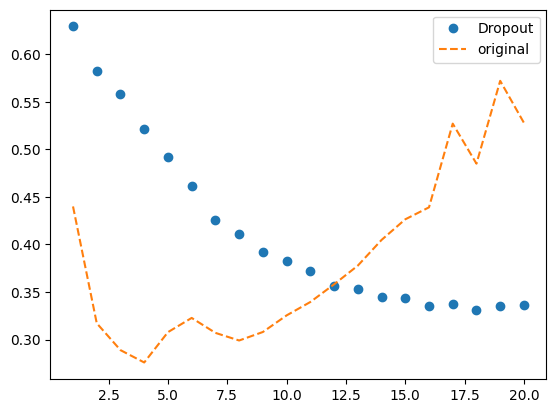

In [12]:
history_dict= history.history
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
val_loss_values_4= history4.history['val_loss']

epoch= range(1,len(loss_values)+1)
plt.plot(epoch, val_loss_values_4,'o', label= 'Dropout')
plt.plot(epoch, val_loss_values,'--', label= 'original')
plt.legend()
plt.show()